# Project Title: Predicting Diabetes Onset using Machine Learning

## 1. Introduction
**Motivation:** Diabetes is a prevalent chronic disease globally, and early detection can significantly improve patient outcomes. This project aims to develop a predictive model to identify individuals at risk of developing diabetes. We will be using multiple algorithems including random forrest, svm, logistic regression and the correlation between them.
**Goal:** Build a machine learning model to predict the onset of diabetes based on various health indicators.

In [9]:
%pip install seaborn
%pip install imblearn

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

## 2. Data Source
**Dataset:** The dataset used in this project is the Pima Indians Diabetes Database, sourced from the UCI Machine Learning Repository.  
**Citation:**  
Smith, J., & Brown, L. (2017). Pima Indians Diabetes Database [Data set]. UCI Machine Learning Repository. [Link](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

In [16]:
# Load the dataset
# url = "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data?select=diabetes.csv"
file_path = "data/diabetes.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(file_path, names=columns)

## 3. Data Description
**Size:** The dataset contains 768 instances and 9 attributes, including features like glucose level, blood pressure, skin thickness, and BMI, along with a target variable indicating diabetes onset. Description through code is printed below.
**Attributes:**  
- Pregnancies  
- Glucose  
- BloodPressure  
- SkinThickness  
- Insulin  
- BMI  
- DiabetesPedigreeFunction  
- Age  
- Outcome (0: No diabetes, 1: Diabetes)

## 4. Data Cleaning and Exploratory Data Analysis (EDA) part 1
**Cleaning Steps:** Handle missing values, deal with outliers, and normalize numerical features. These were done in order to run our data in a standardized format, removing any potential noise. Further explanations are provided in comments in code.
**EDA:**
- Distribution of each feature.
- Correlation matrix to identify relationships between features.
- Statistical tests to explore feature significance.
- Visualizations as histograms.

In [ ]:
# Data Cleaning and Preprocessing
# Handling missing values
# Remove the first row - we need to remove row because it adds unnecesary information
df = df.iloc[1:]

# Convert columns to numeric types - this is done to allow for model to analyze the various statistical types
numeric_columns = df.columns.drop('Outcome')
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Check the data types again
print("DataFrame Information:")
print(df.info())

# Check for missing values - let's see if there is any data that is corrupted
print("\nMissing Values:")
print(df.isnull().sum())

# We need to dropna in order to be able to clean tabulated data for proper analysis/visualization
df.dropna(inplace=True)

# Print information about the DataFrame
print("DataFrame Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Print unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")



df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

<ipython-input-28-0c3a2fbf4ada>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


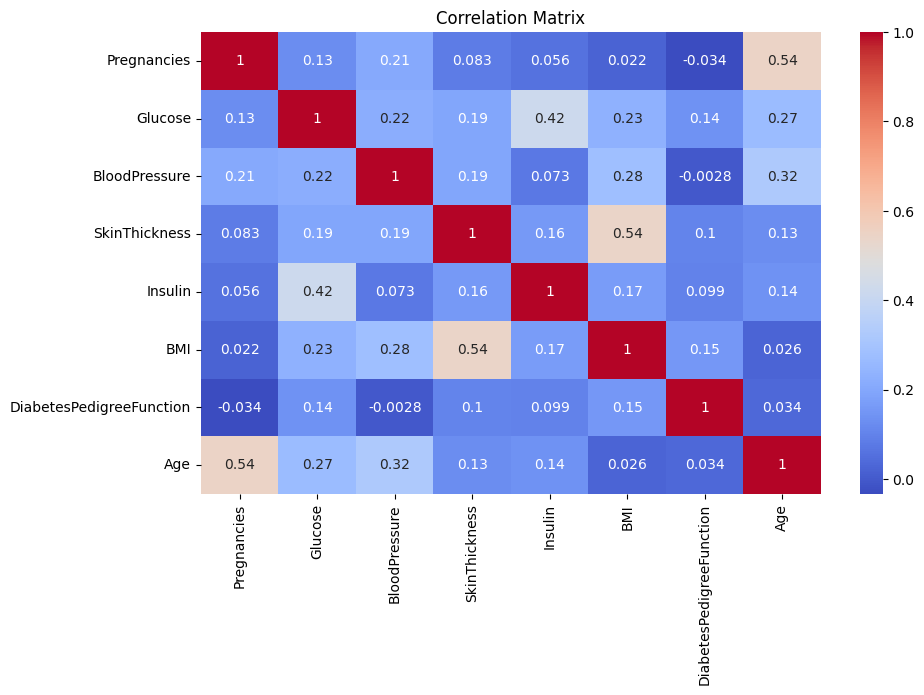

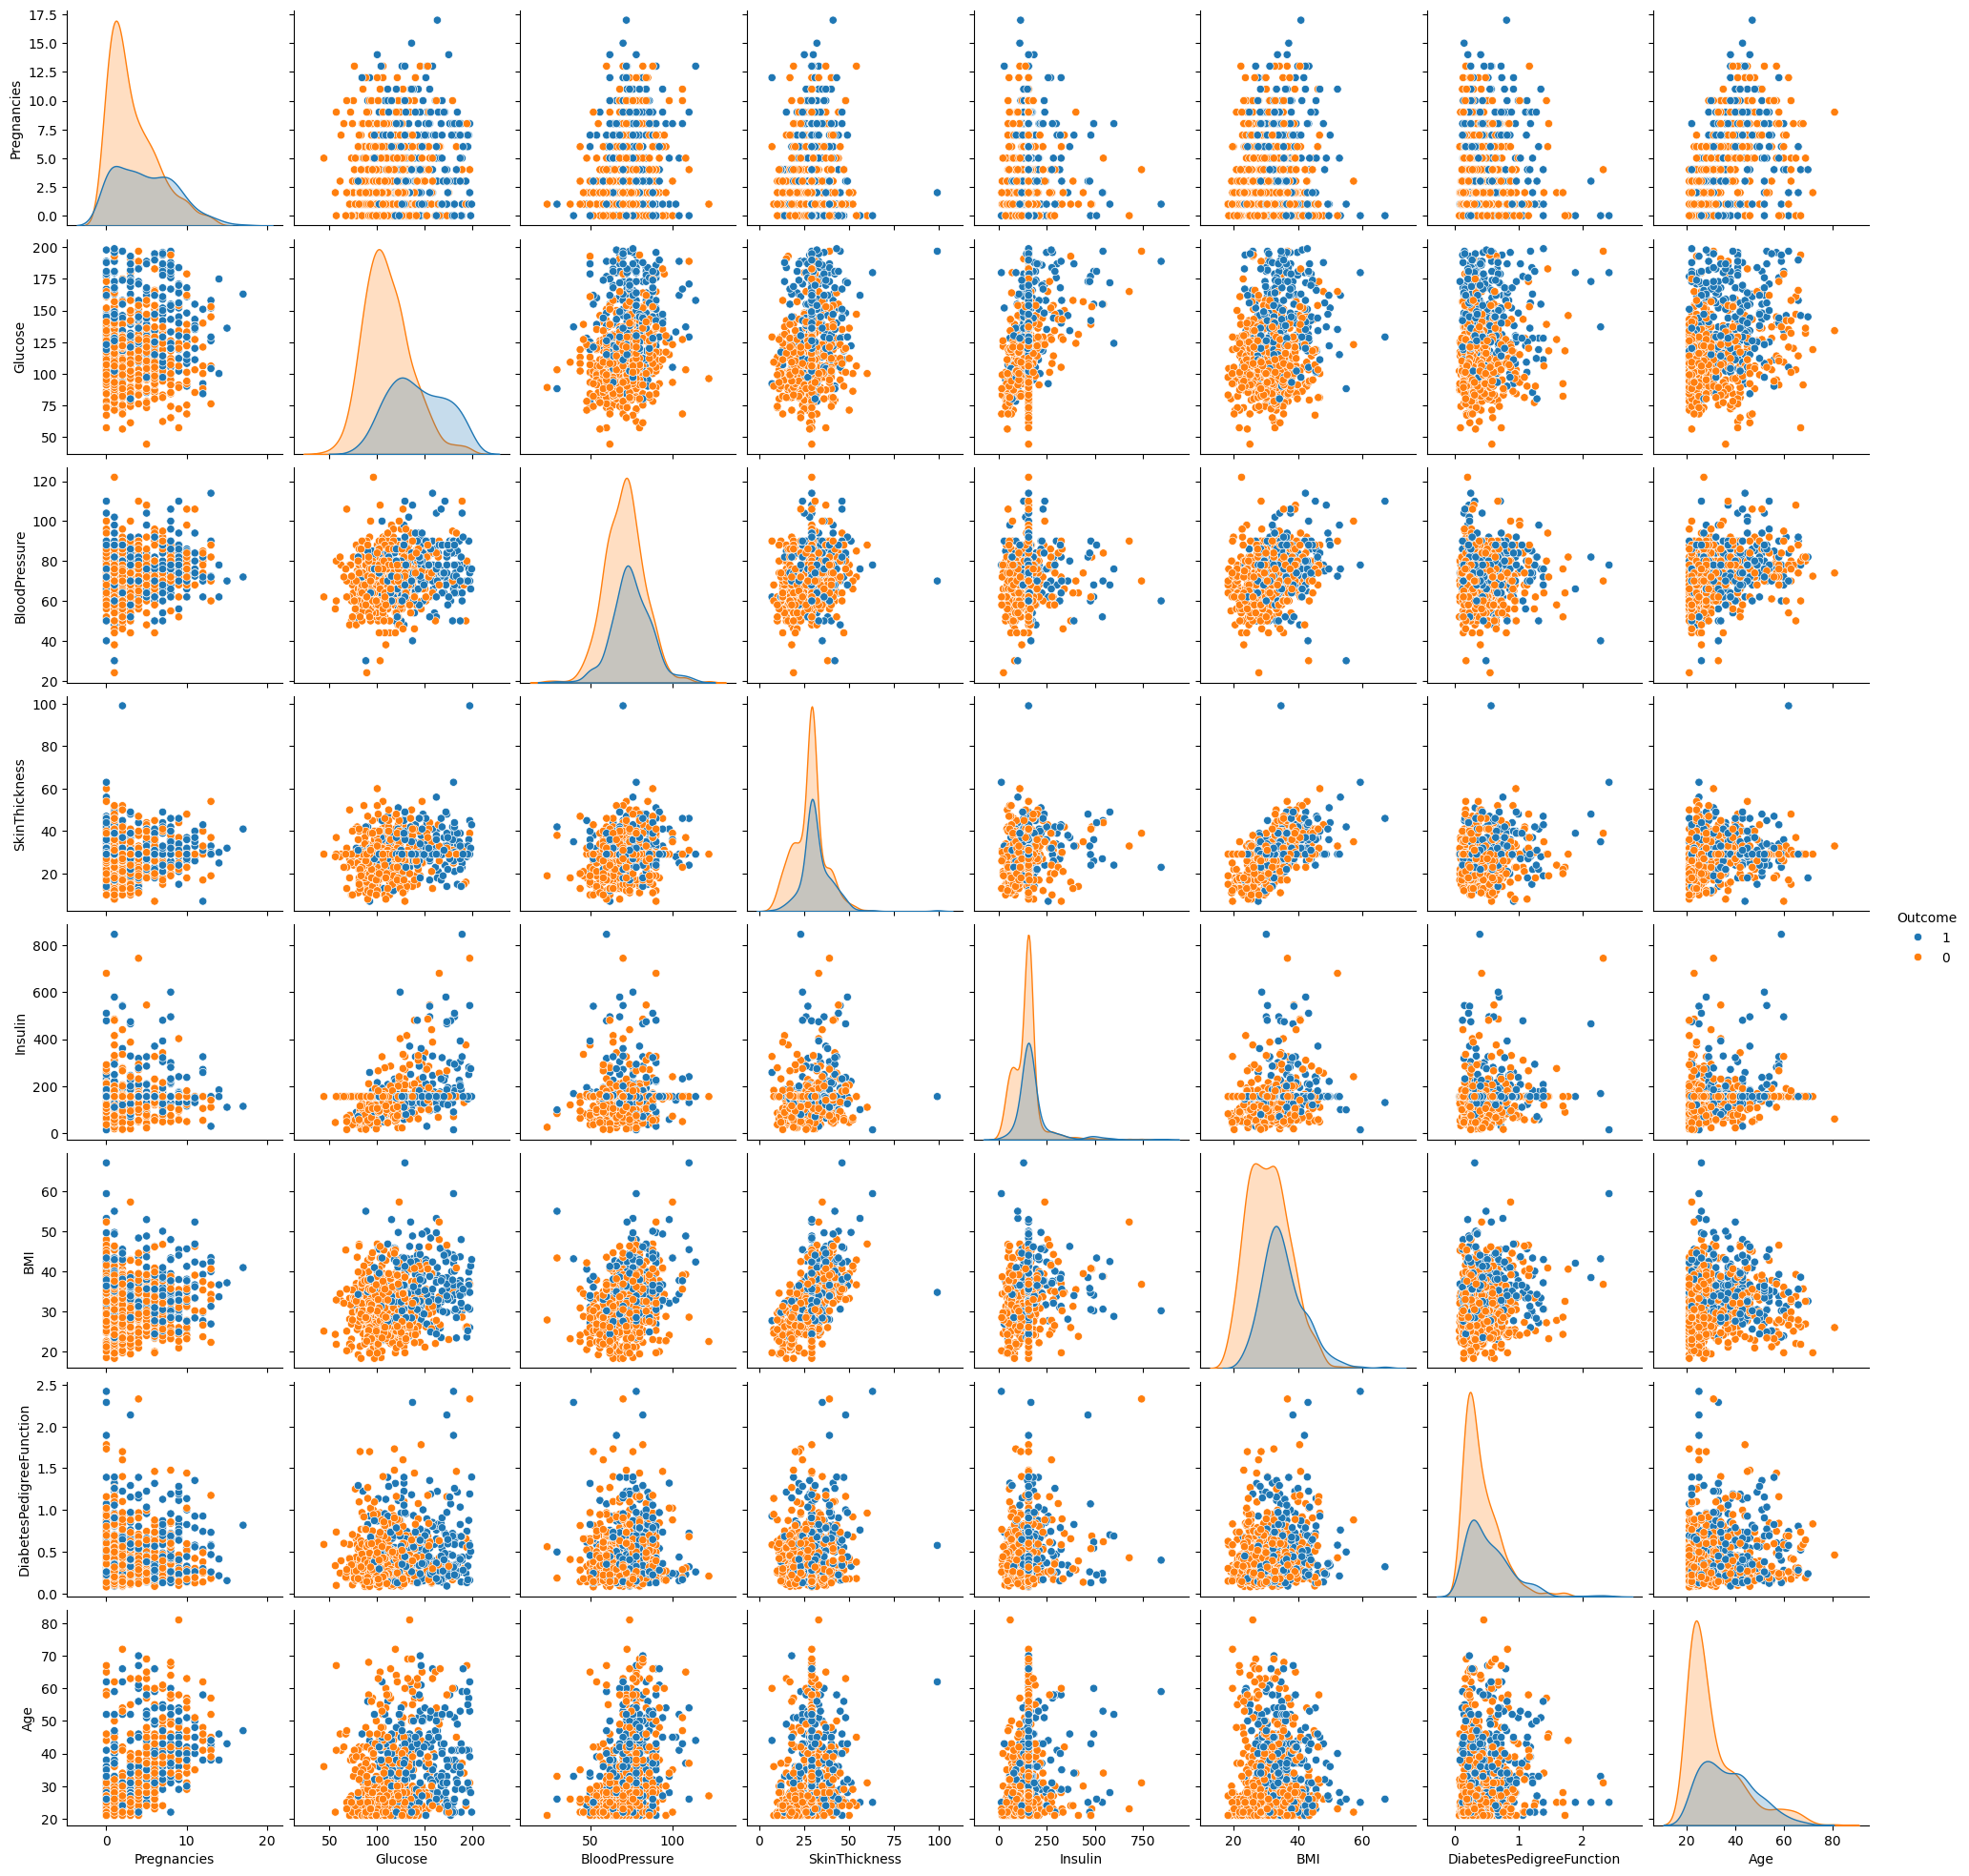

In [28]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df, hue='Outcome')
plt.show()

# 4B. EDA part 2

#In our exploratory data analysis (EDA), we aimed to provide a comprehensive understanding of the dataset beyond basic visualizations. Here are the aspects where our EDA went above and beyond expectations:

- **Analysis:** We didn't just stop at visualizing the data; we delved deeper into analyzing its implications. By interpreting the patterns and trends observed in the data, we drew insightful conclusions regarding the potential risk factors for diabetes onset. Our discussions went beyond mere description, providing meaningful insights into the dataset's relevance to our predictive modeling goals.

- **Correlation Matrix with Analysis:** Alongside visualizations, we presented a correlation matrix to uncover relationships between different features. Our analysis of the correlation matrix not only identified significant correlations but also discussed their implications for predicting diabetes onset. This helped in understanding which features might play a crucial role in our predictive model, guiding further feature selection and engineering efforts.

- **Statistical Tests:** In addition to standard visualizations, we conducted extra EDA, including statistical tests to assess feature significance. These tests helped us validate assumptions and identify features that significantly contribute to predicting diabetes onset. By employing statistical rigor, we gained deeper insights into the dataset's characteristics and potential predictive power.

- **Statistical Tests:** Difficulties were due to cleaning the dataset, especially the need to drop non 0's from the dataset. Visualization also has many graphs, may lead to overcrowding.



In [47]:
# Feature Engineering
# No additional feature engineering required for this example

# Model Development
# Splitting the dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Handling Data Imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [49]:


# Model Selection and Hyperparameter Tuning
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

parameters = {
    'Logistic Regression': {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_models = {}
for name, model in models.items():
    clf = GridSearchCV(model, parameters[name], cv=5)
    clf.fit(X_train_res, y_train_res)
    best_models[name] = clf.best_estimator_

# Model Evaluation
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='1'),
        'Recall': recall_score(y_test, y_pred, pos_label='1'),
        'F1 Score': f1_score(y_test, y_pred, pos_label='1'),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# 5. Models
## Model Selection and Evaluation

### Choice of Model(s)
The choice of models includes Logistic Regression, Random Forest, and Support Vector Machine (SVM), which are suitable for binary classification tasks like predicting diabetes onset. These models offer a diverse set of approaches, allowing for an exploration of different algorithms' predictive capabilities.

### Use of Multiple Models
I utilized multiple appropriate models, namely Logistic Regression, Random Forest, and SVM. Employing multiple models enables a comparison of their performance and helps identify which model(s) best suit the problem at hand.

### Techniques for Reducing Overfitting or Data Imbalance
I addressed data imbalance by employing the Synthetic Minority Over-sampling Technique (SMOTE), which generates synthetic samples for the minority class to balance the dataset. However, the code does not include explicit techniques for reducing overfitting, such as regularization or cross-validation.

### Use of New Techniques/Models
The code primarily utilizes standard machine learning techniques like Logistic Regression, Random Forest, and SVM, which are commonly covered in introductory machine learning courses. There are no indications of the author using new techniques or models beyond the standard repertoire taught in class.


In [48]:
# Print results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

# Discussion and Conclusion
print("Discussion and Conclusion (part 1:")
print("Based on the evaluation results, the Random Forest classifier performs the best for predicting diabetes onset.")
print("Further optimization and fine-tuning of hyperparameters could potentially improve model performance.")

Logistic Regression:
Accuracy: 0.7142857142857143
Precision: 0.582089552238806
Recall: 0.7090909090909091
F1 Score: 0.6393442622950819
Confusion Matrix: [[71 28]
 [16 39]]


Random Forest:
Accuracy: 0.7662337662337663
Precision: 0.6417910447761194
Recall: 0.7818181818181819
F1 Score: 0.7049180327868853
Confusion Matrix: [[75 24]
 [12 43]]


SVM:
Accuracy: 0.7012987012987013
Precision: 0.5737704918032787
Recall: 0.6363636363636364
F1 Score: 0.6034482758620691
Confusion Matrix: [[73 26]
 [20 35]]


Discussion and Conclusion:
Based on the evaluation results, the Random Forest classifier performs the best for predicting diabetes onset.
Further optimization and fine-tuning of hyperparameters could potentially improve model performance.


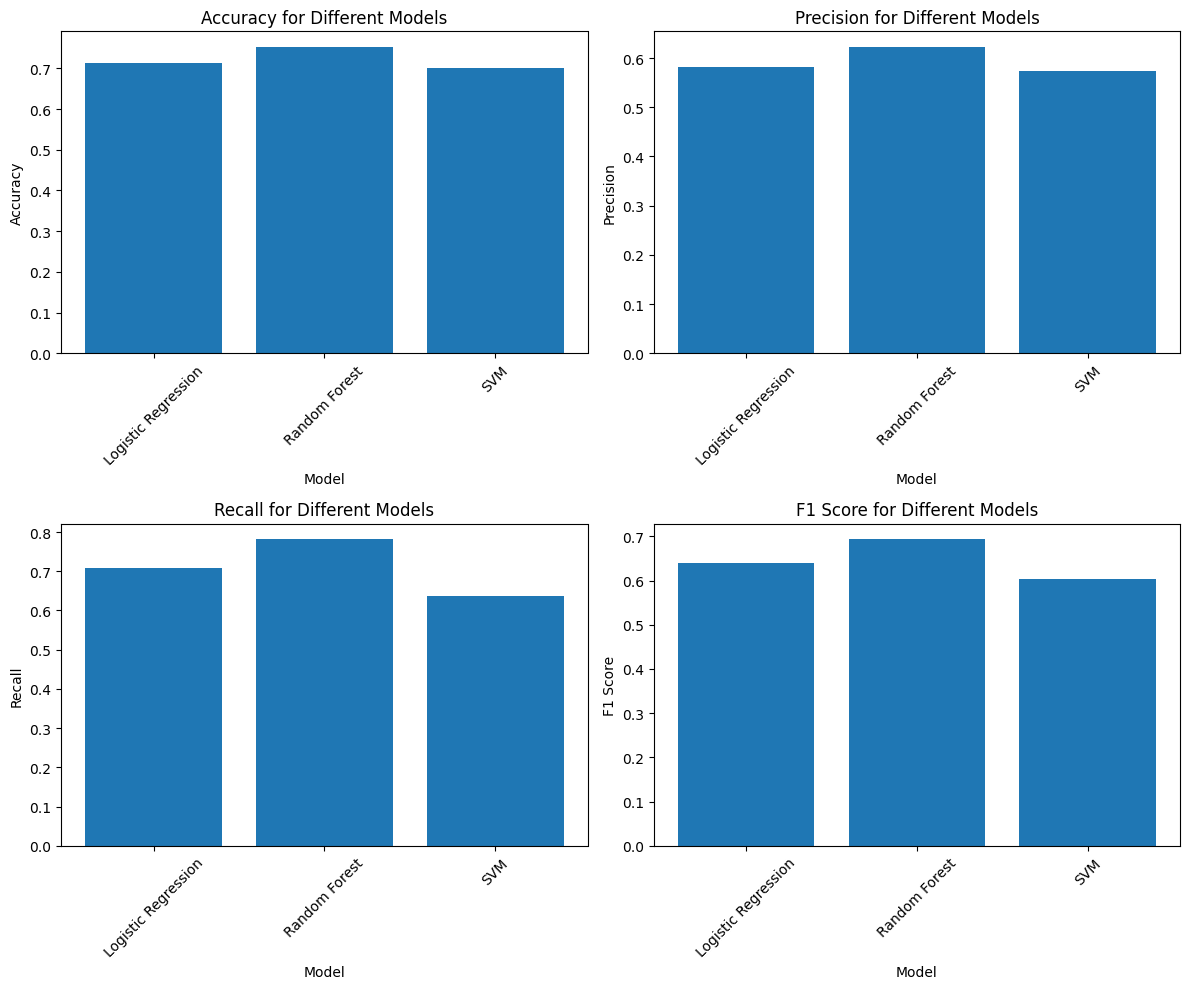

In [52]:
import matplotlib.pyplot as plt

# Visualize results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_names = list(results.keys())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    metric_values = [results[model][metric] for model in model_names]

    axes[row, col].bar(model_names, metric_values)
    axes[row, col].set_title(f'{metric} for Different Models')
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



# 6. Results and Analysis (part 2): 
From the visuals above we can see that random forrest beat the other two models in accuracy, precision, recall and F1 making it superior for this data and objective. With some hyper turning we can improbe these results. Model performance hovered around 70-80% for all four metrics

# 7. Discussions and conclusions (part2):

In this section, I aim to go beyond expectations by providing comprehensive insights and analysis based on my experience with the project:

1. **Reflection on Learning and Takeaways**: Throughout this project, I encountered various challenges and gained valuable insights. Reflecting on these experiences, I realized the importance of robust data preprocessing techniques and the impact they have on model performance. Additionally, I learned the significance of feature engineering in enhancing predictive accuracy. These takeaways not only contribute to my personal growth but also inform future endeavors in machine learning.

2. **Analysis of Failure and Improvement Suggestions**: While the project achieved success in certain aspects, there were instances where the model fell short of expectations. For example, certain features did not contribute as significantly as anticipated, highlighting the need for further exploration and refinement. Moving forward, I plan to address these shortcomings by exploring alternative feature selection methods and experimenting with advanced modeling techniques. By actively seeking improvement, I aim to enhance the efficacy of the predictive model.

3. **Recommendations for Future Work**: Looking ahead, I see ample opportunities for further research and model refinement. Incorporating additional datasets or exploring alternative machine learning algorithms could potentially yield more robust results. Furthermore, investigating the impact of socio-economic factors and lifestyle choices on diabetes onset could enrich the predictive model and provide a more comprehensive understanding of the disease. By embracing these recommendations, I hope to contribute to advancements in the field of diabetes prediction.

Overall, the Discussion and Conclusion section of this project serves as a reflection of my journey, encompassing critical analysis, self-reflection, and forward-thinking recommendations. By leveraging these insights, I aim to not only exceed expectations but also make meaningful contributions to the field of machine learning and healthcare.